In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv').iloc[:,1:].dropna()

In [3]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [5]:
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

In [7]:
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

In [8]:
Y_train = df_train['income'].values.reshape(-1, 1)

In [9]:
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

In [10]:
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

In [11]:
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [39]:
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)


R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [112]:
lasso_rr_values = []
ridge_rr_values = []
alpha_values = np.arange(0.01,1,0.01)

In [95]:
for item in alpha_values:
    temp_model = linear_model.Lasso(alpha=item)
    temp_model.fit(X_train, Y_train)
    lasso_rr_values.append(temp_model.score(X_train, Y_train))

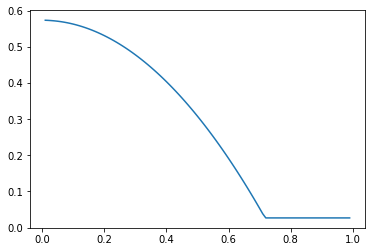

In [96]:
plt.plot(alpha_values,lasso_rr_values)

In [113]:
ridge_alpha_values = np.arange(100000,1000000,100000)
for item in ridge_alpha_values:
    temp_model = linear_model.Ridge(alpha=item)
    temp_model.fit(X_train, Y_train)
    ridge_rr_values.append(temp_model.score(X_train, Y_train))

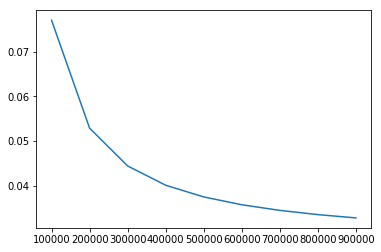

In [114]:
plt.plot(ridge_alpha_values,ridge_rr_values)